# IMPORTANDO Y CARGANDO LAS LIBRERIAS

---





In [24]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\TensorFlow Structural Time Series

c:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\TensorFlow Structural Time Series


In [25]:
#IMPORTAMOS LAS LIBRERIAS
import pandas as pd
import numpy as np

In [26]:
#OBTENEMOS LOS DATOS
data = pd.read_csv("Daily Bike Sharing.csv", 
                    index_col="dteday", 
                    parse_dates=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
#SELECCIONAMOS LAS VARIABLES QUE CREEMOS RELEVANTES PARA NUESTRO MODELO
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head()

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


# TRANSFORMACIÓN DE LOS DATOS

In [28]:
#RENOMBRAMOS LA VARIABLE QUE QUEREMOS PRONOSTICAR
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [29]:
#index
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [31]:
#Le decimos a python hey mi conjunto de datos es esta frecuencia diaria
# Esto es muy importante, cuando los modelos lean nuestra variable independiente, sabrán que hablamos de frecuencia diaria
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

# VISUALIZACIÓN

<AxesSubplot: xlabel='dteday'>

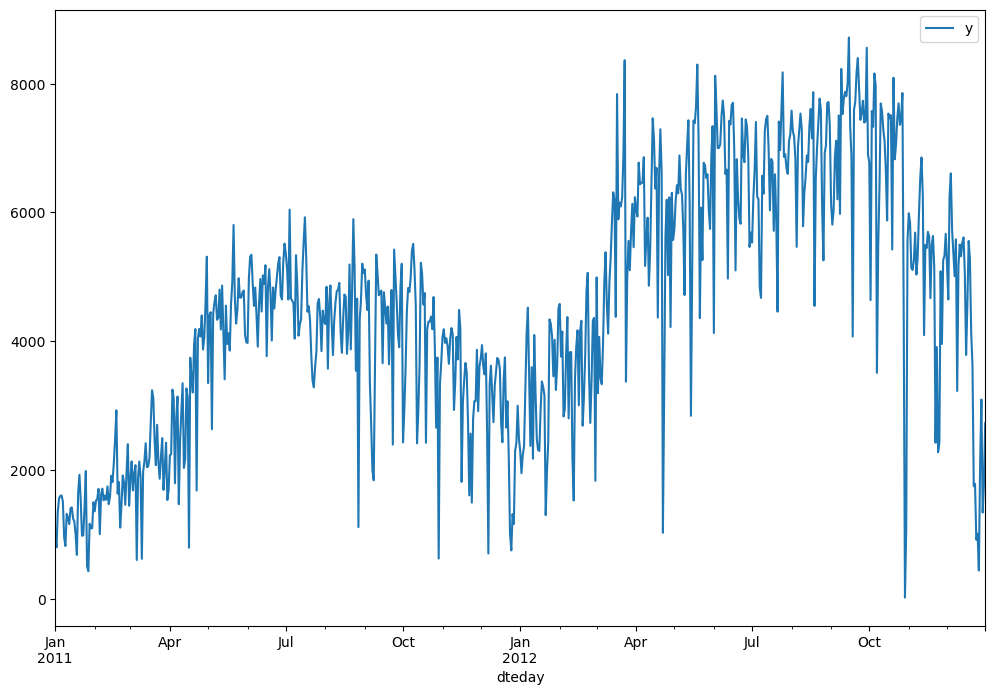

In [32]:
#Visualization
# podemos ver cierta estacionalidad (lo cual es algo que esperariamos en el alquiler de bicicletas), tambien podemos ver cierta tendencia creciente y el valor promedio aumenta con el tiempo.
# Otra cosa que podemos apreciar es la oscilacion tan grande en ciertos dias ej: de 4k a 8k
dataset["y"].plot(figsize = (12,8), legend = True)

# CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [33]:
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-01,5191,0,0,2,0.298333,0.316904,0.806667,0.059704


# REGRESSORS

In [34]:
#Libraries
import tensorflow_probability as tfp

In [35]:
# Isolate de Regressors
exog = dataset.iloc[:,1:]
exog.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,
2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900


In [36]:
# matrix
exog = np.asmatrix(dataset.iloc[:,1:].astype(np.float64))
exog[1]

matrix([[0.      , 0.      , 2.      , 0.363478, 0.353739, 0.696087,
         0.248539]])

In [37]:
# linear regression
regressors = tfp.sts.LinearRegression(design_matrix = exog,
                                      name = "regressors")

# SEASONALITY

In [38]:
# Isolating dependent variable
y = training_set['y'].astype(np.float64)
y[:5]

dteday
2011-01-01     985.0
2011-01-02     801.0
2011-01-03    1349.0
2011-01-04    1562.0
2011-01-05    1600.0
Freq: D, Name: y, dtype: float64

In [39]:
# Weekday seasonality
weekday_effect = tfp.sts.Seasonal(num_seasons=7, 
                                  num_steps_per_season= 1, 
                                  observed_time_series = y, 
                                  name= "weekday_effect")
                                  

In [40]:
# number of days per month
num_days_per_month = np.array(
    [[31,28,31,30,31,30,31,31,30,31,30,31], #2011
     [31,29,31,30,31,30,31,31,30,31,30,31]] #2012
)

In [41]:
# monthly seasonality
monthly_effect = tfp.sts.Seasonal(num_seasons=12, 
                                  num_steps_per_season= num_days_per_month, 
                                  observed_time_series = y, 
                                  name= "monthly_effect")
                                  

# AUTOREGRESIVE AND TREND COMPONENTS

In [42]:
# Trend
trend = tfp.sts.LocalLinearTrend(observed_time_series=y, 
                                 name="trend")

In [43]:
# Autorregressive
autoregressive = tfp.sts.Autoregressive(order=1, #podemos empezar con 1 y probar..seria cuantos retrazos 
                                        observed_time_series=y, 
                                        name="autoregressive")

# TENSORFLOW STRUCTURAL TIME SERIES

In [44]:
# Librerias
model = tfp.sts.Sum([regressors, 
                    weekday_effect,
                    monthly_effect,
                    autoregressive,
                    trend],
                    observed_time_series = y)

In [45]:
# fit with HMC
samples, kernel_results = tfp.sts.fit_with_hmc(model=model, 
                                               observed_time_series=y, 
                                               num_results=100,
                                               num_warmup_steps=50,
                                               num_leapfrog_steps=15, 
                                               num_variational_steps=150,
                                               seed=1502)


c:\Users\leoma\Desktop\projects\env\lib\site-packages\tensorflow_probability\python\mcmc\sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


In [46]:
# Forecast
forecast = tfp.sts.forecast(model = model, 
                            observed_time_series= y, 
                            parameter_samples= samples, 
                            num_steps_forecast= len(test_set))
# this forecast will have a lot of component that can be use to study the time series for our predictions

In [47]:
# Predictions
forecast.mean()

<tf.Tensor: shape=(31, 1), dtype=float64, numpy=
array([[4277.10487375],
       [3491.37745527],
       [4470.88672156],
       [4525.32199825],
       [4789.82491251],
       [4759.20777907],
       [3958.01453058],
       [3916.84347377],
       [3269.49207081],
       [3505.22995504],
       [3577.54835626],
       [3849.21454021],
       [4613.42106269],
       [4605.05861024],
       [4564.49090985],
       [3125.16555906],
       [3360.88746215],
       [4225.45469096],
       [4496.53562894],
       [3676.71081829],
       [3667.77100322],
       [4418.76032172],
       [3772.7821847 ],
       [3215.95554723],
       [3284.5887581 ],
       [2766.26536724],
       [3530.75534871],
       [3523.77043092],
       [3482.54907722],
       [3627.29801095],
       [3071.50091353]])>

In [48]:
forecast.mean()[:,0]

<tf.Tensor: shape=(31,), dtype=float64, numpy=
array([4277.10487375, 3491.37745527, 4470.88672156, 4525.32199825,
       4789.82491251, 4759.20777907, 3958.01453058, 3916.84347377,
       3269.49207081, 3505.22995504, 3577.54835626, 3849.21454021,
       4613.42106269, 4605.05861024, 4564.49090985, 3125.16555906,
       3360.88746215, 4225.45469096, 4496.53562894, 3676.71081829,
       3667.77100322, 4418.76032172, 3772.7821847 , 3215.95554723,
       3284.5887581 , 2766.26536724, 3530.75534871, 3523.77043092,
       3482.54907722, 3627.29801095, 3071.50091353])>

In [49]:
# to pandas
pd.Series(forecast.mean()[:,0], name= "TFP")

0     4277.104874
1     3491.377455
2     4470.886722
3     4525.321998
4     4789.824913
5     4759.207779
6     3958.014531
7     3916.843474
8     3269.492071
9     3505.229955
10    3577.548356
11    3849.214540
12    4613.421063
13    4605.058610
14    4564.490910
15    3125.165559
16    3360.887462
17    4225.454691
18    4496.535629
19    3676.710818
20    3667.771003
21    4418.760322
22    3772.782185
23    3215.955547
24    3284.588758
25    2766.265367
26    3530.755349
27    3523.770431
28    3482.549077
29    3627.298011
30    3071.500914
Name: TFP, dtype: float64

In [51]:
predictions_tfp = pd.Series(forecast.mean()[:,0], name= "TFP")
predictions_tfp.index = test_set.index
predictions_tfp[:2]

dteday
2012-12-01    4277.104874
2012-12-02    3491.377455
Freq: D, Name: TFP, dtype: float64

<AxesSubplot: xlabel='dteday'>

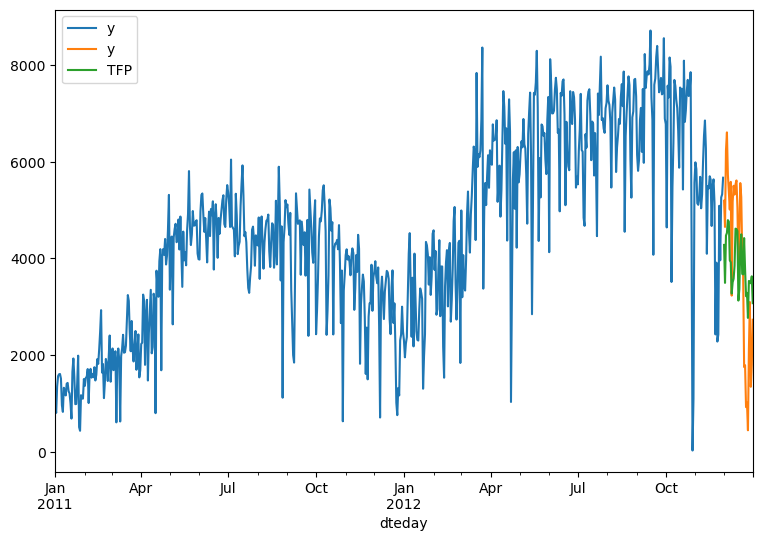

In [52]:
# visualization
training_set['y'].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_tfp.plot(legend = True)

<AxesSubplot: xlabel='dteday'>

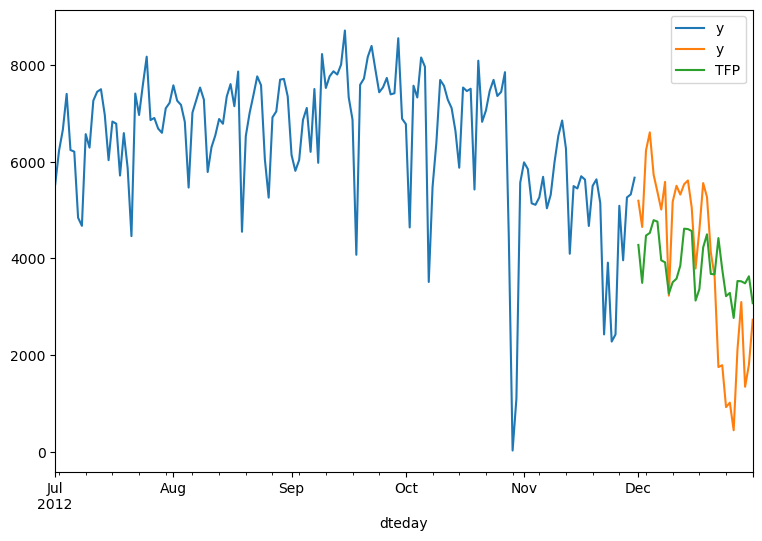

In [53]:
# visualization para los ultimos 6 meses
training_set['y']['2012-07-01':].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_tfp.plot(legend = True)

Bueno, no creo que la Navidad esté muy bien hecha aquí porque creo que deberíamos ver una mayor
caída que nuestro modelo no está haciendo actualmente.
Y por eso creo que la estacionalidad mensual no está perfectamente cumplida aquí.
Y como siguiente paso, lo que haría es intentar encontrar otra forma de intentar modelar la Navidad.
Por ejemplo, podríamos agregar algunas variables ficticias que indiquen valores navideños para que nuestro modelo pueda
en cierto modo también modelamos un poco mejor este mes de diciembre.
Entonces esos hubieran sido mis próximos pasos para mejorarlo.

In [54]:
# MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(round (mean_absolute_error(test_set['y'], predictions_tfp),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_tfp)), 0))

1287.0
1472.0


In [55]:
# MAPE function
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tfp)

65.67577114939226

# EXPORTAR PRONOSTICOS

In [56]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python

C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python


In [57]:
predictions_tfp.to_csv('predictions_tfp.csv', index=True)